# Write a Data Science Blog Post

## Import Libriaries and Load the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
survey = pd.read_csv('survey_results_public.csv')

# Display the first few rows of the dataset to understand its structure
survey.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
# Display basic information about the dataset
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


I have explored the dataset schema and questionnaire visually and identified the columns relevant for answering my business questions.<br>
In the next step I'm going to prepare these columns for further analysis. 

## QUESTION 1: How do attitudes towards AI differ between junior developers and experienced professionals?

Columns relevant for the analysis:<br>

YearsCodePro: NOT including education, how many years have you coded professionally (as a part of your work)?<br>

AISelect: Do you currently use AI tools in your development process?<br>

AISent: How favorable is your stance on using AI tools as part of your development workflow?<br>

AIBen: For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve? Please check all that apply.<br>

AIAcc: How much do you trust the accuracy of the output from AI tools as part of your development workflow?<br>

In [4]:
# Create a new dataframe with relevant columns
question_1 = survey[['YearsCodePro','AISelect','AISent','AIBen','AIAcc']]
print(question_1.info())
question_1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YearsCodePro  51610 non-null  object
 1   AISelect      60907 non-null  object
 2   AISent        45873 non-null  object
 3   AIBen         36894 non-null  object
 4   AIAcc         37302 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB
None


YearsCodePro    13827
AISelect         4530
AISent          19564
AIBen           28543
AIAcc           28135
dtype: int64

In [5]:
# Display unique values in each column
for column in ['YearsCodePro','AISelect','AISent','AIBen','AIAcc']:
    unique_values = question_1[column].str.split(';').explode().unique()
    unique_values_answers = question_1[column].unique()
    print(f'Unique values in {column}:')
    print(unique_values)
    print('\n')
    print(unique_values_answers)
    print('\n')

Unique values in YearsCodePro:
[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


Unique values in AISelect:
['Yes' "No, and I don't plan to" 'No, but I plan to soon' nan]


['Yes' "No, and I don't plan to" 'No, but I plan to soon' nan]


Unique values in AISent:
['Very favorable' nan 'Favorable' 'Indifferent' 'Unsure'
 'Very unfavorable' 'Unfavorable']


['Very favorable' nan 'Favorable' 'Indifferent' 'Unsure'
 'Very unfavorable' 'Unfavorable']


Unique values i

In [6]:
# Replace "Less than 1 year" with 1 and "More than 50 years" with 51
question_1.loc[:,'YearsCodePro'] = question_1['YearsCodePro'].replace({'Less than 1 year':'1', 'More than 50 years': '51'})

# Convert the column to numeric
question_1.loc[:, 'YearsCodePro'] = pd.to_numeric(question_1['YearsCodePro'])

# Verify the changes
print(question_1['YearsCodePro'].unique())

[nan 17.0 27.0 7.0 11.0 25.0 12.0 10.0 3.0 1.0 18.0 37.0 15.0 20.0 6.0 2.0
 16.0 8.0 14.0 4.0 45.0 24.0 29.0 5.0 30.0 26.0 9.0 33.0 13.0 35.0 23.0
 22.0 31.0 19.0 21.0 28.0 34.0 32.0 40.0 50.0 39.0 44.0 42.0 41.0 36.0
 38.0 51.0 43.0 47.0 48.0 46.0 49.0]


In [7]:
# Fill NaN values in 'YearsCodePro' with 'Unknown' to include them in the analysis
question_1_copy = question_1.copy()
question_1_copy.loc[:, 'YearsCodePro_filled'] = question_1_copy['YearsCodePro'].fillna('Unknown')

# Define the columns related to AI for the analysis
question_1_columns = ['AISelect','AISent','AIBen','AIAcc']

# Separate 'Unknown' from the rest for sorting
numeric_years = question_1_copy[question_1_copy['YearsCodePro_filled'] != 'Unknown']
unknown_years = question_1_copy[question_1_copy['YearsCodePro_filled'] == 'Unknown']

# Group and calculate missing value proportions for numeric YearsCodePro
missing_values_by_numeric_years = numeric_years[question_1.columns].isnull().groupby(numeric_years['YearsCodePro_filled']).mean()

# Group and calculate for 'Unknown'
missing_values_for_unknown = unknown_years[question_1_columns].isnull().mean().to_frame().T
missing_values_for_unknown.index = ['Unknown']

# Sort the numeric values and concatenate with 'Unknown'
missing_values_sorted = pd.concat([missing_values_for_unknown, missing_values_by_numeric_years.sort_index()])

print(missing_values_sorted)

         AISelect    AISent     AIBen     AIAcc  YearsCodePro
Unknown  0.232733  0.428292  0.550734  0.547769           NaN
1.0      0.039126  0.235487  0.333212  0.327207           0.0
2.0      0.033349  0.215451  0.309021  0.302543           0.0
3.0      0.036159  0.222086  0.335695  0.327388           0.0
4.0      0.031415  0.218040  0.334992  0.328149           0.0
5.0      0.027794  0.237379  0.366988  0.361032           0.0
6.0      0.027436  0.255716  0.384805  0.376715           0.0
7.0      0.016687  0.246722  0.386969  0.379817           0.0
8.0      0.024716  0.247940  0.397411  0.390349           0.0
9.0      0.019424  0.253851  0.410583  0.401875           0.0
10.0     0.021839  0.269763  0.424792  0.419563           0.0
11.0     0.019817  0.285061  0.434451  0.426829           0.0
12.0     0.022510  0.292065  0.454136  0.444007           0.0
13.0     0.019521  0.299911  0.450754  0.440106           0.0
14.0     0.021257  0.285582  0.457486  0.441774           0.0
15.0    

The analysis of missing values across AI-related columns reveals the following insights.<br>
AISelect has relatively low missing values across most experience levels, with an outlier at 50 years of experience. In contrast, AISent shows more noticeable missing data, ranging from 21% for junior developers (under 5 years of experience) to as high as 71% for the most experiences developers. Both AIBen and AIAcc exhibit similar trends, with missing values around 33-36% for juniors and peaking at 85% for those with 50 years of experience.<br>

After considering two approaches to handle missing data - filling with 'Unknown' versus dropping rows - I chose to fill the missing values. This avoids a 43% reduction in dataset size, preserving the representation of senioer developers, who tend to have more missing data.<br>

The 'Unknown' category in YearsCodePro likely represents respondents with unclear or non-professional coding experience. Due to the igh proportion of missing values across all AI-related questions, this group appears to be less engaged with AI Tools. I qill therefore exclude the 'Unknown' category from further analysis, as there is no strong AI engagement within this group.

In [8]:
# Exclude rows where 'YearsCodePro_filled' is 'Unknown'
question_1_filtered = question_1_copy[question_1_copy['YearsCodePro_filled'] != 'Unknown']

print(question_1_filtered['YearsCodePro_filled'].value_counts())

YearsCodePro_filled
1.0     5495
2.0     4168
3.0     4093
5.0     3526
10.0    3251
4.0     3215
6.0     2843
8.0     2549
7.0     2517
12.0    1777
15.0    1635
20.0    1549
9.0     1493
11.0    1312
13.0    1127
14.0    1082
25.0     998
16.0     946
18.0     867
17.0     814
30.0     689
24.0     632
19.0     516
22.0     492
23.0     448
26.0     426
21.0     380
27.0     380
28.0     342
35.0     285
29.0     196
40.0     194
32.0     194
34.0     169
38.0     134
33.0     132
36.0     119
31.0     106
37.0     104
45.0      56
42.0      55
39.0      54
41.0      51
51.0      50
44.0      42
43.0      37
46.0      21
50.0      14
48.0      14
49.0      11
47.0      10
Name: count, dtype: int64


In [9]:
# Define AI-Related columns
columns_to_fill = ['AISelect', 'AISent', 'AIBen', 'AIAcc']

# Fill missing values with Unknown
question_1_filled = question_1_filtered.copy()
question_1_filled[columns_to_fill] = question_1_filled[columns_to_fill].fillna('Unknown')

# Check the distribution of missing values after filling
print(question_1_filled[columns_to_fill].isnull().sum())

AISelect    0
AISent      0
AIBen       0
AIAcc       0
dtype: int64


In [10]:
# Define a function to categorize experience levels
def categorize_experience(years):
    if pd.isna(years):
        return 'Unknown'
    elif years <=5:
        return 'Junior'
    elif years >=10:
        return 'Experienced'
    else:
        return 'Mid-level'

# Apply the function to create a new column "Experience Level"
question_1_filled.loc[:,'ExperienceLevel'] = question_1_filled['YearsCodePro'].apply(categorize_experience)

# Check the distribution of experience levels
print(question_1_filled['ExperienceLevel'].value_counts())

ExperienceLevel
Experienced    21711
Junior         20497
Mid-level       9402
Name: count, dtype: int64


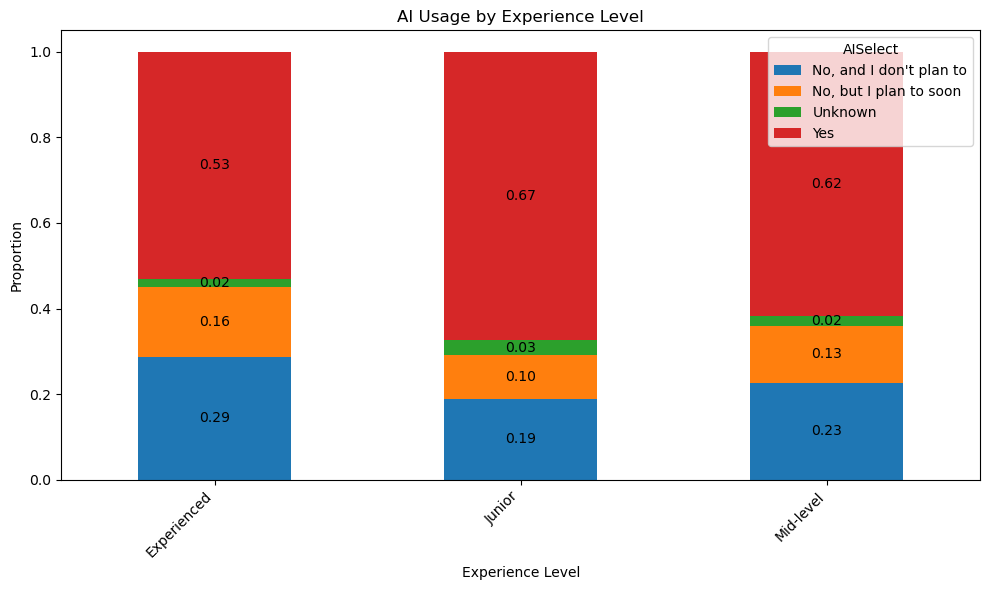

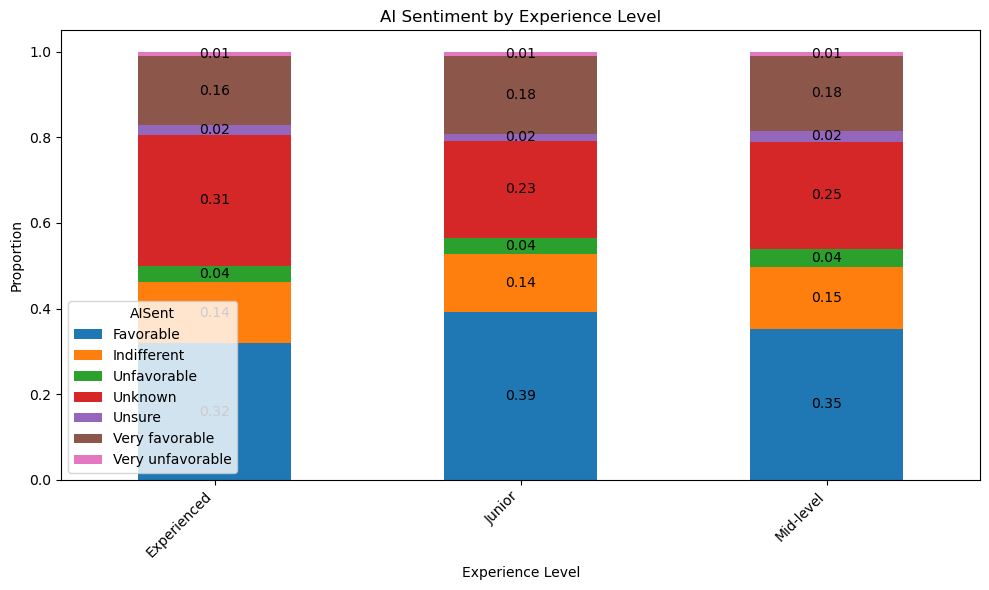

In [11]:
# AI Usage (AI Select) by Experience Level
ai_usage_by_experience = question_1_filled.groupby('ExperienceLevel')['AISelect'].value_counts(normalize=True).unstack().fillna(0)

ax_usage = ai_usage_by_experience.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('AI Usage by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')

# Add percentages on the bars
for container in ax_usage.containers:
    ax_usage.bar_label(container, fmt='%.2f', label_type='center')

plt.tight_layout()
plt.show()

# AI Sentiment (AISent) by Experience Level
ai_sentiment_by_experience = question_1_filled.groupby('ExperienceLevel')['AISent'].value_counts(normalize=True).unstack().fillna(0)

# Visualize AI Sentiment by Experience Level
ax_sentiment = ai_sentiment_by_experience.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title ('AI Sentiment by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')

# Add percentages on the bars for AI Sentiment
for container in ax_sentiment.containers:
    ax_sentiment.bar_label(container, fmt='%.2f', label_type='center')

plt.tight_layout()
plt.show()


In summary, junior developers are the most active users of AI tools, followed closely by mid-level and experienced developers. There's a notable portion of experienced developers who are still cautious about AI, with more planning to adopt in the future.<br>

Junior developers are more favorable towards AI and habe higher adoption rates compared to experienced developers, who are more resistant and have a higher proportion expressing unfavorable sentiment. Mid-level developers fall between these two extremes, with a balanced stance.

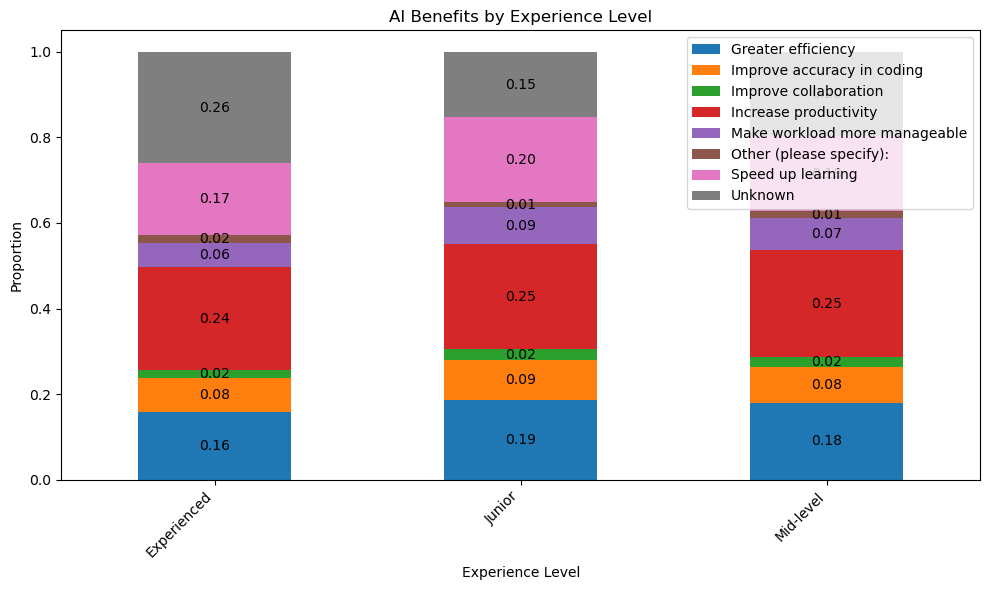

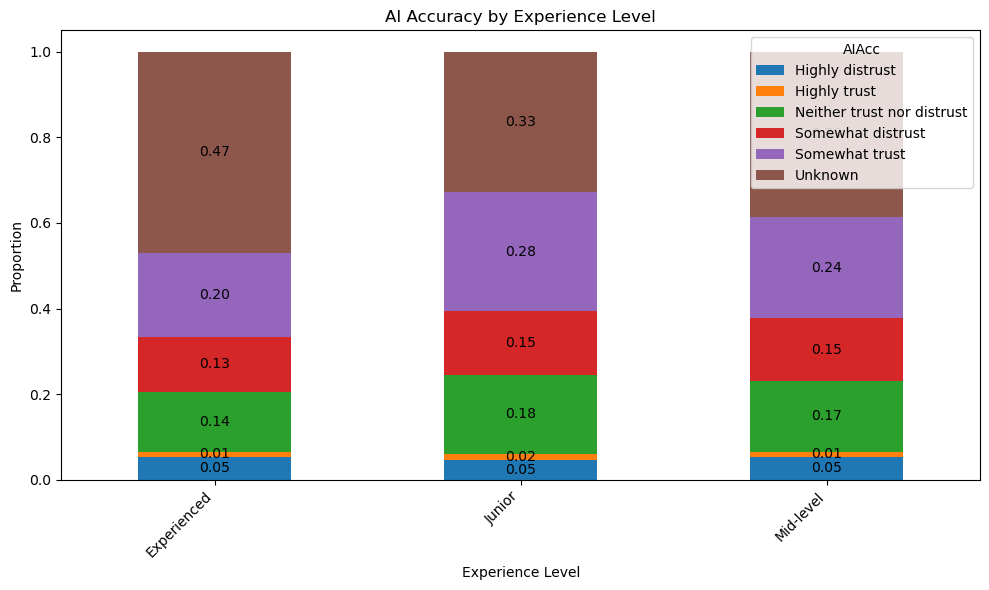

In [12]:
# Function to split and count occurrences in a column
def split_and_count(series):
    exploded = series.str.split(';').explode()
    return exploded.value_counts(normalize=True)

# Split and count occurences for AIBen and AIAcc
ai_benefits_by_experience = question_1_filled.groupby('ExperienceLevel')['AIBen'].apply(split_and_count).unstack().fillna(0)

# For AIAcc (AI Accuracy), no need to split because it's single choice
ai_accuracy_by_experience = question_1_filled.groupby('ExperienceLevel')['AIAcc'].value_counts(normalize=True).unstack().fillna(0)

# Plot AIBen (AI Benefits) by Experience Level
ax_ben = ai_benefits_by_experience.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('AI Benefits by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')

# Add percentages on the bars for AIBen
for container in ax_ben.containers:
    ax_ben.bar_label(container, fmt='%.2f', label_type='center')

plt.tight_layout()
plt.show()

# Plot AIAcc (AI Accuracy) by Experience Level
ax_acc = ai_accuracy_by_experience.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('AI Accuracy by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')

# Add percentages on the bars fpr AIAcc
for container in ax_acc.containers:
    ax_acc.bar_label(container, fmt='%.2f', label_type='center')

plt.tight_layout()
plt.show()

Productivity and efficiency are the dominant benefits across experience levels. Juniors place a string emphasis on speeding up learning, while experienced developers focus more on magaing workload.<br>
Neutrality and neither trust nor distrust, somewhat trust are the most commin sentiments, expecially among juniors and mid-level developers.<br>
Somewhat distrust category remains but is outweighted by more neutral or favorable attitudes.<br>
The high 'unknown' percentage, particularly among experienced developers, suggests that many may either not use AI tools frequently or are unsure about their effectiveness in handling accuracy.<br>
So while there is some trust in AI accuracy, many developers, especially those with more experience, remain cautious or undecided about its reliability.

## QUESTION 2: What are the most popular technologies (programming languages, platforms, webframes) among people who are learning to code?

Columns relevant for the analysis:<br>

MainBranch: Which of the following options best describes you today? For the purpose of this survey, a developer is someone who writes code.<br>

DevType: Which of the following describes your current job, the one you do most of the time?<br>

LanguageAdmired: Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)<br>

PlatformAdmired: Which cloud platforms have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the platform and want to continue to do so, please check both boxes in that row.)<br>

WebframeAdmired: Which web frameworks and web technologies have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the framework and want to continue to do so, please check both boxes in that row.)

In [13]:
question_2 = survey[['MainBranch', 'DevType', 'LanguageAdmired', 'PlatformAdmired', 'WebframeAdmired']]
print(question_2.info())
question_2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MainBranch       65437 non-null  object
 1   DevType          59445 non-null  object
 2   LanguageAdmired  50872 non-null  object
 3   PlatformAdmired  31377 non-null  object
 4   WebframeAdmired  34943 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB
None


MainBranch             0
DevType             5992
LanguageAdmired    14565
PlatformAdmired    34060
WebframeAdmired    30494
dtype: int64

In [14]:
# Get unique values for the relevant columns
for column in ['MainBranch', 'DevType', 'LanguageAdmired', 'PlatformAdmired', 'WebframeAdmired']:
    unique_values = question_2[column].str.split(';').explode().unique()
    print(f'Unique values in {column}:')
    print(unique_values)
    print('\n')

Unique values in MainBranch:
['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am']


Unique values in DevType:
[nan 'Developer, full-stack' 'Developer Experience' 'Student'
 'Academic researcher' 'Project manager' 'Developer Advocate'
 'Developer, back-end' 'Other (please specify):' 'Developer, front-end'
 'Database administrator' 'Developer, desktop or enterprise applications'
 'Cloud infrastructure engineer'
 'Data scientist or machine learning specialist'
 'Research & Development role'
 'Developer, embedded applications or devices' 'System administrator'
 'DevOps specialist' 'Engineering manager' 'Designer'
 'Security professional' 'Senior Executive (C-Suite, VP, etc.)'
 'Developer, mobile' 'Developer, game or graphics'
 'Data or business analyst' 'Educator' 'Developer, QA or test'
 'Product manager' 

In [15]:
# Filter for people who are learning to code
learners = question_2[question_2['MainBranch'] == 'I am learning to code'].copy()

# Check the filtered dataset
print(learners.info())
print(learners['DevType'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 3 to 65430
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MainBranch       3875 non-null   object
 1   DevType          3156 non-null   object
 2   LanguageAdmired  2462 non-null   object
 3   PlatformAdmired  1070 non-null   object
 4   WebframeAdmired  1468 non-null   object
dtypes: object(5)
memory usage: 181.6+ KB
None
DevType
Student                                          1724
Developer, full-stack                             331
Other (please specify):                           202
Developer, back-end                               149
Developer, front-end                              149
Developer, mobile                                  62
System administrator                               53
Data or business analyst                           46
Academic researcher                                42
Developer, game or graphics               

In [16]:
# Fill missing values with 'Unknown'
learners.fillna('Unknown', inplace=True)

# Split multi-select fields and count unique occurences
for column in ['LanguageAdmired', 'PlatformAdmired', 'WebframeAdmired']:
    exploded = learners[column].str.split(';').explode()

    # Count the occurencies of each technology
    print(f'Most popular technologies in {column}:')
    print(exploded.value_counts().head(10))
    print('\n')

Most popular technologies in LanguageAdmired:
LanguageAdmired
Unknown                    1413
Python                     1260
JavaScript                 1167
HTML/CSS                   1146
SQL                         821
C++                         568
Java                        546
Bash/Shell (all shells)     485
TypeScript                  480
C                           469
Name: count, dtype: int64


Most popular technologies in PlatformAdmired:
PlatformAdmired
Unknown                      2805
Google Cloud                  289
Amazon Web Services (AWS)     256
Vercel                        250
Cloudflare                    198
Firebase                      191
Microsoft Azure               157
Netlify                       121
Digital Ocean                  88
VMware                         85
Name: count, dtype: int64


Most popular technologies in WebframeAdmired:
WebframeAdmired
Unknown         2407
Node.js          677
React            597
Express          301
Next.js       

A large portion of respondents didn't provide a clear preference that can suggest that many are still exploring or uncertain about their preferred language.<br>
Among the top languages are Python, JavaScript, HTML/CSS and SQL.<br>

A significant majority of learners are still unfamiliar or undecided about cloud platforms, which makes sense given their early stage in the learning process.<br>
Among top platforms are Google Cloud and AWS.<br>

Similar to languages and platforms many learners still haven't yet identified their preferred web frameworks.<br>
Node.js, React and Express are top choices.

## QUESTION 3: Do smaller or larger companies prefer remote work, and how does this preference vary by region?
Columns relevant for the analysis:<br>

OrgSize: Approximately how many people are employed by the company or organization you currently work for?<br>

RemoteWork: Which best describes your current work situation?<br>

Country: Where do you live?

In [17]:
# Create a new dataframe with the relevant columns for answering the third business question
columns_question_3 = ['OrgSize', 'RemoteWork', 'Country']

# Create 'Question 3' dataframe
question_3 = survey[columns_question_3].copy()
print(question_3.info())
question_3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrgSize     47480 non-null  object
 1   RemoteWork  54806 non-null  object
 2   Country     58930 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB
None


OrgSize       17957
RemoteWork    10631
Country        6507
dtype: int64

In [18]:
# Extract unique values for 'OrgSize', 'RemoteWork' and 'Country'
for column in ['OrgSize', 'RemoteWork', 'Country']:
    unique_values = question_3[column].str.split(';').explode().unique()
    print(f'Unique values in {column}:')
    print(unique_values)
    print('\n')

Unique values in OrgSize:
[nan '100 to 499 employees' '2 to 9 employees'
 'Just me - I am a freelancer, sole proprietor, etc.' '10 to 19 employees'
 '20 to 99 employees' '5,000 to 9,999 employees'
 '1,000 to 4,999 employees' 'I don’t know' '10,000 or more employees'
 '500 to 999 employees']


Unique values in RemoteWork:
['Remote' nan 'In-person' 'Hybrid (some remote, some in-person)']


Unique values in Country:
['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Port

In [19]:
# Transform company size into categories
# Define a function to categorize OrgSize into small, medium and large companies
def categorize_org_size(size):
    if pd.isna(size) or size == "I don't know":
        return 'Unknown'
    elif size in ['Just me - I Am a freelancer, cole proprietor, etc.', '2 to 9 employees', '10 to 19 employees','20 to 99 employees']:
        return 'Small'
    elif size in ['100 to 499 employees', '500 to 999 employees','1,000 to 4,999 employees']:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new column 'CompanySizeCategory'
question_3['CompanySizeCategory'] = question_3['OrgSize'].apply(categorize_org_size)

# Check the distribution of company size categories
print(question_3['CompanySizeCategory'].value_counts())

CompanySizeCategory
Small      18671
Unknown    17957
Medium     17230
Large      11579
Name: count, dtype: int64


In [20]:
# Replace missing values (NaN) in 'RemoteWork' with 'Unknown'
question_3['RemoteWork'].fillna('Unknown', inplace=True)

# Check the distribution of RemoteWork categories
print(question_3['RemoteWork'].value_counts())

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Unknown                                 10631
Name: count, dtype: int64


In [21]:
# Check the resulting data structure
print(question_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   OrgSize              47480 non-null  object
 1   RemoteWork           65437 non-null  object
 2   Country              58930 non-null  object
 3   CompanySizeCategory  65437 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB
None


In [22]:
#Check the distribution of 'Unknown' in RemoteWork across different countries and company sizes
unknown_remote = question_3[question_3['RemoteWork'] == 'Unknown']
print(unknown_remote.shape[0])
print(unknown_remote['Country'].value_counts())
print(unknown_remote['OrgSize'].value_counts())

10631
Country
United States of America                                1657
India                                                   1094
Germany                                                  677
United Kingdom of Great Britain and Northern Ireland     477
Canada                                                   339
                                                        ... 
Trinidad and Tobago                                        1
Mozambique                                                 1
Fiji                                                       1
Brunei Darussalam                                          1
Micronesia, Federated States of...                         1
Name: count, Length: 162, dtype: int64
OrgSize
Just me - I am a freelancer, sole proprietor, etc.    18
I don’t know                                           5
100 to 499 employees                                   4
2 to 9 employees                                       4
10 to 19 employees                      

In [23]:
# Compare proportions of 'Unknown' vs. non-'Unknown'
valid_remote = question_3[question_3['RemoteWork'] != 'Unknown']
print(unknown_remote['OrgSize'].value_counts(normalize=True))
print("\n", valid_remote['OrgSize'].value_counts(normalize=True))

OrgSize
Just me - I am a freelancer, sole proprietor, etc.    0.486486
I don’t know                                          0.135135
100 to 499 employees                                  0.108108
2 to 9 employees                                      0.108108
10 to 19 employees                                    0.081081
500 to 999 employees                                  0.027027
10,000 or more employees                              0.027027
1,000 to 4,999 employees                              0.027027
Name: proportion, dtype: float64

 OrgSize
20 to 99 employees                                    0.205594
100 to 499 employees                                  0.183167
10,000 or more employees                              0.117130
1,000 to 4,999 employees                              0.112809
2 to 9 employees                                      0.101785
10 to 19 employees                                    0.086019
500 to 999 employees                                  0.067070
Just

The 'Unknown' group in the RemoteWork column shows a significant proportion of freelancers/sole proprietors (48,6%) who are located in the US, India, Germany and the UK. I'd impute their work mode based on regional and company size trends would help align the data with valid responses (such as that large US-based companies prefer remote work).

In [24]:
# Function to impute remote work status based on country trends
def impute_remote_work(row):
    if row['RemoteWork'] == 'Unknown':
        if row['Country'] == 'United States of America':
            return 'Remote'
        elif row['Country'] == 'United Kingdom of Great Britain and Northern Ireland' or row['Country'] == 'Germany':
            return 'Hybrid (some remote, some in-person)'
        elif row['Country'] == 'India':
            return 'In-person'
        else:
            return 'Hybrid (some remote, some in-person)'
    else:
        return row['RemoteWork']

# Apply the function to imoute unknown values in 'RemoteWork'
question_3['RemoteWork'] = question_3.apply(impute_remote_work, axis=1)

print(question_3['RemoteWork'].value_counts())

RemoteWork
Hybrid (some remote, some in-person)    30895
Remote                                  22488
In-person                               12054
Name: count, dtype: int64


In [25]:
# Define the countries I'm focusing on
selected_countries = ['United States of America', 'Germany', 'India', 'United Kingdom of Great Britain and Northern Ireland']

# Filter the data to include only respondents from the selected countries
question_3_filtered_countries = question_3[question_3['Country'].isin(selected_countries)]

# Check the filtered data
print(question_3_filtered_countries['Country'].value_counts())

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Name: count, dtype: int64


In [26]:
# Group by CompanySizeCategory, Country and RemoteWork
grouped_remote_work = question_3_filtered_countries.groupby(['CompanySizeCategory', 'Country', 'RemoteWork']).size().unstack()

# Check the group data
print(grouped_remote_work.head())

RemoteWork                                                              Hybrid (some remote, some in-person)  \
CompanySizeCategory Country                                                                                    
Large               Germany                                                                              510   
                    India                                                                                478   
                    United Kingdom of Great Britain and Northern Ir...                                   353   
                    United States of America                                                            1192   
Medium              Germany                                                                             1036   

RemoteWork                                                              In-person  \
CompanySizeCategory Country                                                         
Large               Germany                  

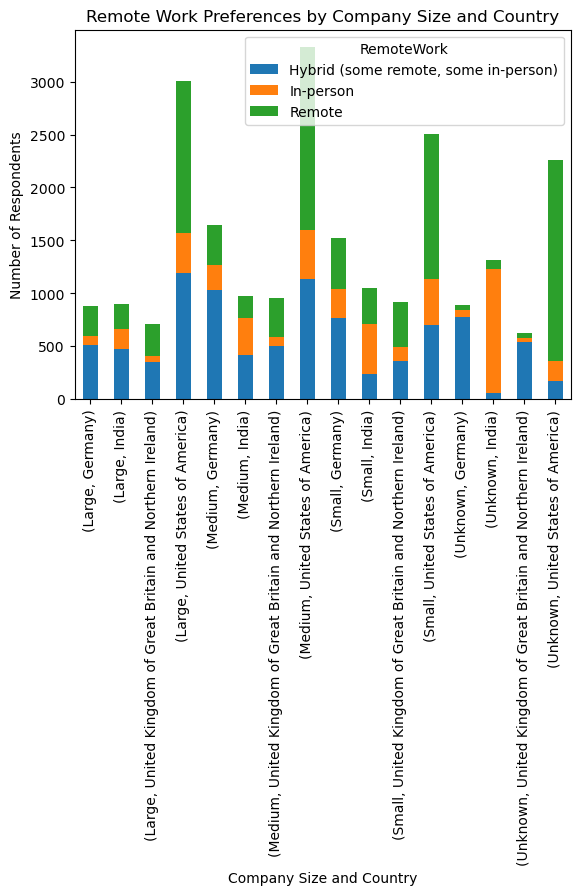

In [27]:
# Plot remote work preferences for each company size category across the four countries
grouped_remote_work.plot(kind='bar', stacked=True)
plt.title('Remote Work Preferences by Company Size and Country')
plt.xlabel('Company Size and Country')
plt.ylabel('Number of Respondents')
plt.show()

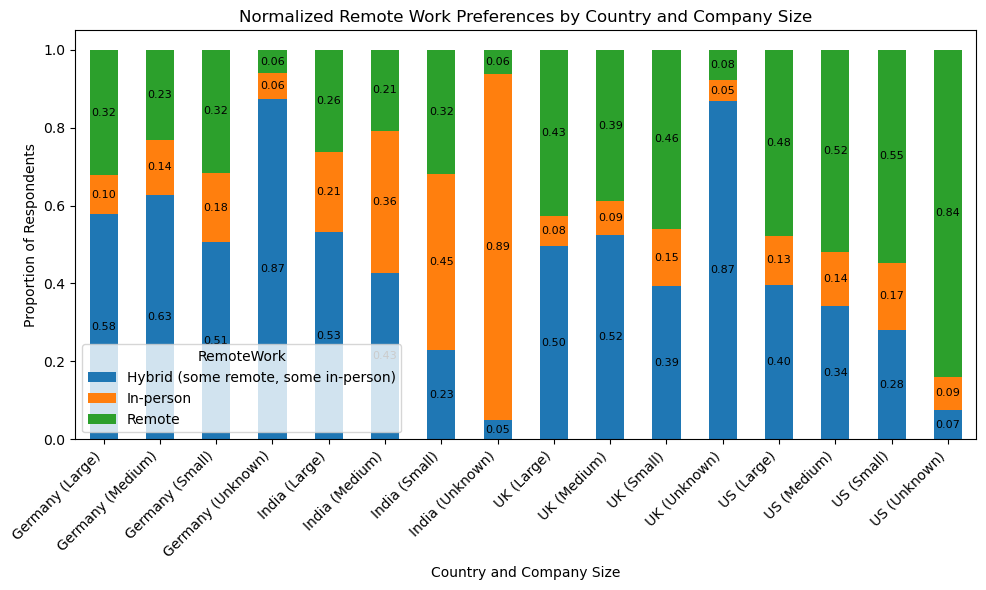

In [28]:
# Group the data by Country, Company Size and Remotework
grouped_remote_work_country_first = question_3_filtered_countries.groupby(['Country', 'CompanySizeCategory', 'RemoteWork']).size().unstack()

# Normalize the counts to represent proportions of respondents in each group
grouped_remote_work_country_first_normalized = grouped_remote_work_country_first.div(grouped_remote_work_country_first.sum(axis=1), axis=0)

# Create shorter labels for UK and US
short_labels = [
    f'{label[0]} ({label[1]})' if label[0] not in ['United Kingdom of Great Britain and Northern Ireland', 'United States of America']
    else (f'UK ({label[1]})' if label[0] == 'United Kingdom of Great Britain and Northern Ireland' else f'US ({label[1]})')
    for label in grouped_remote_work_country_first_normalized.index
]

# Plot the normalized data as a stacked bar chart
ax = grouped_remote_work_country_first_normalized.plot(kind='bar', stacked=True, figsize=(10,6))

# Apply the custom labels to the x-axis (Country and Company Size)
ax.set_xticklabels(short_labels)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Normalized Remote Work Preferences by Country and Company Size')
plt.xlabel('Country and Company Size')
plt.ylabel('Proportion of Respondents')

# Add percentages on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=8)

plt.tight_layout()
plt.show()

The graph above shows that in-person work is generally less popular than hybrid or remote work across all countries, with notable regional differences.<br>
Smaller companies in India and Germany have a higher proportion of in-person work, while larger companies across most regions prefer a mix of hybrid and remote work.<br>

Remote work is most common in the US across all company sizes, while Germany and the UK show a stronger preference for hybrid work, especially in larger companies. India, while having a strong preference for remote work in larger companies, also has a higher proportion of in-person work in smaller companies.<br>

In-person work is most common in Germany and India, particularly among smaller companies, but is least popular in the US. Hybrid work dominates in Germany and the UK, particularly in larger companies.<br>

Overall the company size plays a significant role in shaping remote work preferences. The larger companies generally favoring remote or hybrid setups, the smaller ones have more varied preferences, with some showing a higher preference for in-person work.<br>

During data wrangling phase I decided not to delete the rows with the missing values in the column 'OrgSize' in order to preserve as much information as possible. Instead, I chose to handle missing data by filling the gaps with "Unknown" to ensure these records were included in the analysis. This approach allowed me to get comprehensive insights, as simply dropping the rows could have skewed the results or reduced the sample size.<br>
If I had more time to explore the "Unknown" company size group, I would start by analyzing their geographic distribution. By comparing the countries they belong to with the trends seen in small, medium and large companies, I could potentially find correlations between certain regions and specific company sizes.<br>
Next, I would examine the Years of Experience data, as developers with more experience might lead towards larger companies.<br>
Additionally, I would look into the tools and techniques used by this group. If they favor enterprise-level tools like AWS, it might indicate that they work for larger companies. On the other hand, a preference for niche or lighter technologies could suggest smaller organizations.<br>
Finally I could compare the average earnings of the "Unknown" group to the known salary distributions of different company sizes. Higher salaries could point towards larger organizations, while lower salaries might correlate with smaller companies.<br>
These approaches would help shed light on the likely company sizes of the "Unknown" group.
